# RandomForest Project

In [2]:
#Importing Dataset
import numpy as np
import pandas as pd

#for data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [3]:
#Lets Import Dataset
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Lets Check Data Summary
data.shape

(400, 5)

In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#There is no null values .we are good to preoceed

In [8]:
#Lets check of data stats

In [9]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In my viewpoint data is with good stats .



But . User id is a nominal data . its just for name shake . and we dont need user id because user not contributing anything in model creation so i am going to delete User then check relationship by plotting in distribution plot.

In [10]:
data.drop(columns=['User ID'],inplace=True)

In [12]:
data.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


We have one categorical feature Gender . So we have to convert in numerical data by encoding technique .

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(data[['Gender']])
pd.Series(df2)
data['Gender']=df2
data.head() #Here Male is Set as 0 and Female is set as 1

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [16]:
#Lets plot Distribution plot.

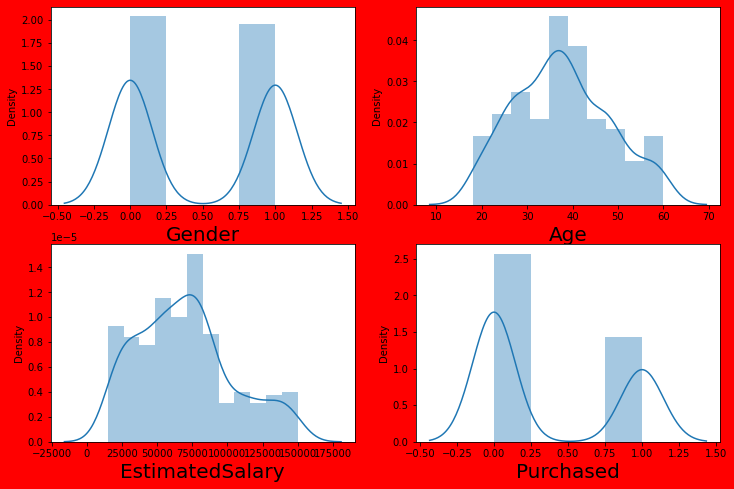

In [17]:
plt.figure(figsize=(12,8),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [23]:
# I only found outliers in Estimated salary .
#So , We have delete outliers . By using Z score.

In [25]:
from scipy.stats import zscore

In [26]:
z_score=zscore(data[['EstimatedSalary']])
np_abs=np.abs(z_score)
filtering_entry=(z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


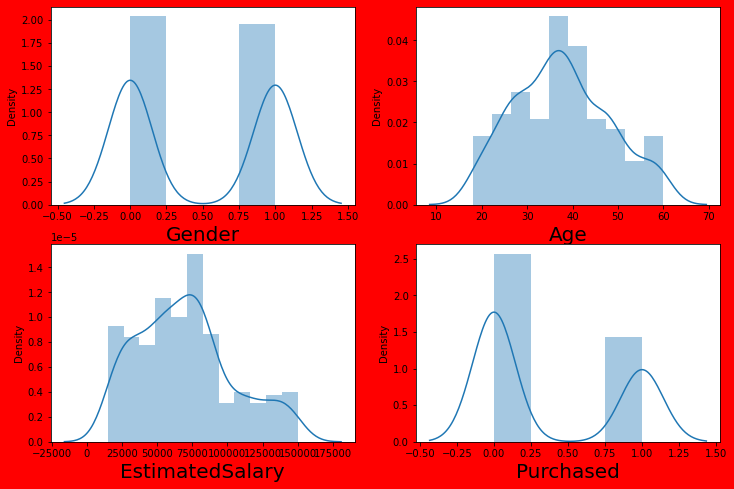

In [28]:
#Now again plotting in distplot.
plt.figure(figsize=(12,8),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

Now its fine .we are good to check multicollinearity problem using VIF - Vriance Inflation Factor

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
x=data.drop(columns=['Purchased'])
y=data.Purchased

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [42]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.007960,Gender
1,1.029078,Age
2,1.027234,EstimatedSalary


In [46]:
# Our Model is not Have Multicollinearity Problem. lets check again with heat map

In [44]:
df=data.corr().abs()

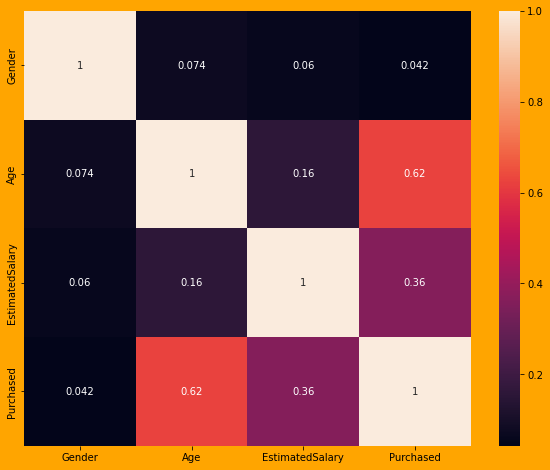

In [47]:
plt.figure(figsize=(10,8),facecolor='orange')
sns.heatmap(df,annot=True)
plt.show()

In [49]:
#Our Model is not have collinearity problem. we good to do train test split (Hold Out Method)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

In [53]:
#Lets create one function to check accuracy for again again .
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("================Training Score================")
        print("Accuracy Score==> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("==================Testing Score================")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report===> ",classification_report(y_test,pred))
        

In [54]:
#Lets Create Model by random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [56]:
cnn=RandomForestClassifier()

In [57]:
cnn.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
#Lets check accuracy.


In [62]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

================Training Score================
Accuracy Score==>  100.0
==================Testing Score================
Accuracy Score ==>  92.0
Classification Report===>                precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.89      0.93      0.91        42

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



Its might be our model is overfitted. So lets do hyperparameter by GridSearchcv tuning and remove overfitting .
RandomTreeClassifier internally using DecisionTree its mean when we tuning the hyperparamter
 We have to same parameter which are we using in DecisionTree.only 1 parameter is added . n_estimators 
Means  how much tree you want to create ..

In [63]:
from sklearn.model_selection import GridSearchCV

In [73]:
best_param={'n_estimators':[10,14],
           'max_depth':[12,14],
           'min_samples_split':[10,12],
           'min_samples_leaf':[15,18],
           'criterion':['entropy','gini']}

In [74]:
grd=GridSearchCV(estimator=cnn,param_grid=best_param,cv=5)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 18,
 'min_samples_split': 10,
 'n_estimators': 14}

In [77]:
frd=grd.best_estimator_

In [78]:
frd.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=18, min_samples_split=10,
                       n_estimators=14)

In [79]:
#Lets Check Score

In [80]:
metrics_score(frd,x_train,x_test,y_train,y_test,train=True)
metrics_score(frd,x_train,x_test,y_train,y_test,train=False)

================Training Score================
Accuracy Score==>  90.66666666666666
==================Testing Score================
Accuracy Score ==>  91.0
Classification Report===>                precision    recall  f1-score   support

           0       0.93      0.91      0.92        58
           1       0.88      0.90      0.89        42

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



#Now our model is looking Good and There is not Overfitting Problem.Now we are good to productionsed our model.

In [ ]:
#Student of DataScience 
#Student of DataTrained - Saurav
#Time - 22-09-2022
#Date - 11:58